In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from utilities import *

In [3]:
x_train, y_train, x_test, y_test = load_data()

In [5]:
print(f"Dimension of x_train : {x_train.shape}")
print(f"Dimension of y_train : {y_train.shape}")
print(np.unique(y_train, return_counts=True))

Dimension of x_train : (1000, 64, 64)
Dimension of y_train : (1000, 1)
(array([0., 1.]), array([500, 500]))


In [6]:
print(f"Dimension of  x_test: {x_test.shape}")
print(f"Dimension of y_test : {y_test.shape}")
print(np.unique(y_test, return_counts=True))

Dimension of  x_test: (200, 64, 64)
Dimension of y_test : (200, 1)
(array([0., 1.]), array([100, 100]))


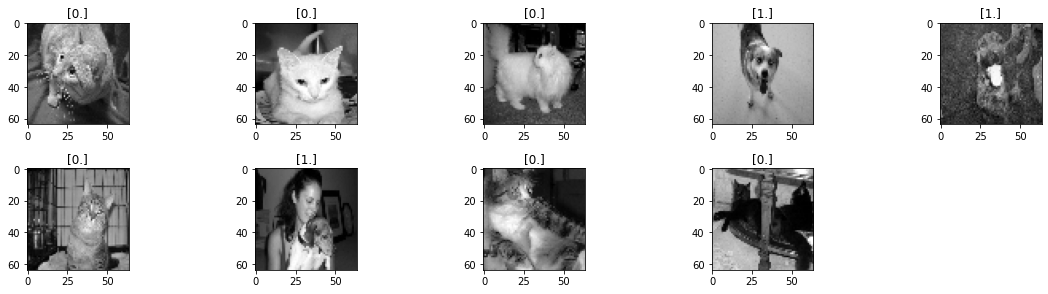

In [8]:
plt.figure(figsize=(16,8))
for i in range(1,10):
    plt.subplot(4, 5, i)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [10]:
def normalize(A, min=0, max=255):
    return (A - min) / (max - min)

In [11]:
x_train_norm = normalize(x_train)
print(f"Dimension of  x_train_norm: {x_train_norm.shape}")

Dimension of  x_train_norm: (1000, 64, 64)


In [35]:
def flat_image(A):
    m = A.shape[0]
    image_size = A.shape[1] * A.shape[2]
    B = A.flatten().reshape(m, image_size)
    return B

In [36]:
x_train_flat = flat_image(x_train_norm)
print(f"Dimension of  x_train_flat: {x_train_flat.shape}")

Dimension of  x_train_flat: (1000, 4096)


In [46]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [37]:
def sigmoid(A):
    return 1/(1 + np.exp(-A))

In [38]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

In [51]:
from sklearn.metrics import log_loss

In [40]:
def gradients(A, X, y):
    m = len(y)
    dW = (1/m)*np.dot(X.T, A-y)
    db = (1/m)*np.sum(A-y)
    return (dW, db)

In [41]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [42]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

In [52]:
def artificial_neuron(X, y, learning_rate=0.1, n_iter=100):
    history = []
    W, b = initialisation(X)
    
    for i in range(n_iter):
        A = model(X, W, b)
        cost = log_loss(y, A)
        history.append(cost)
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        
    y_pred = predict(X, W, b)
    print(f"Accuracy score : {accuracy_score(y, y_pred)}")
    return (W, b, history)

In [62]:
(W, b, history) = artificial_neuron(x_train_flat, y_train, learning_rate=0.01, n_iter=500)

Accuracy score : 0.508


In [63]:
x_test_norm = normalize(x_test)
x_test_flat = flat_image(x_test_norm)
(W_test, b_test, history_test) = artificial_neuron(x_test_flat, y_test, learning_rate=0.01, n_iter=500)

Accuracy score : 0.595


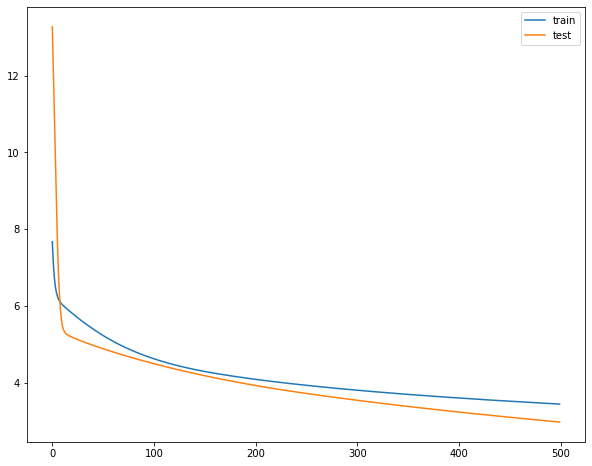

In [67]:
plt.figure(figsize=(10, 8))
plt.plot(history, label="train")
plt.plot(history_test, label="test")
plt.legend()
plt.show()

/home/remir/.local/lib/python3.8/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


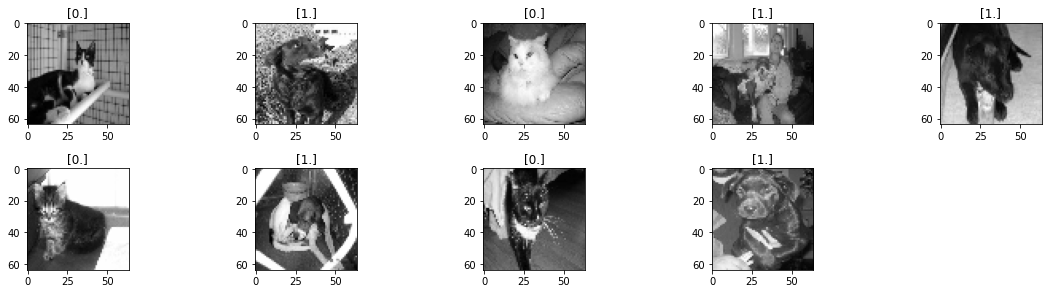

In [68]:
plt.figure(figsize=(16,8))
for i in range(1,10):
    plt.subplot(4, 5, i)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(y_test[i])
    plt.tight_layout()
plt.show()

In [72]:
for i in range(1,10):
    print(predict(x_test_flat[i, :], W_test, b_test))

[False]
[False]
[False]
[False]
[ True]
[False]
[ True]
[ True]
[ True]
